## Redes Convolucionales para reconocimiento de imágenes

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Implementación de Redes Convolucionales en Keras" se propuso una implementación a través de *"Keras"* de una red convolucional para una base de datos que contiene imágenes de dígitos manuscritos. En este *notebook* se pretende evaluar el uso de *keras* al aplicar una red convolucional sobre un conjunto de imágenes más complejo, "Fashion MNIST". 

### Instrucciones generales

1. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

2. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

### Criterios a evaluar

Los criterios que se evaluarán son:

Preparación de las variables: Se adaptan los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test. [15 puntos]

Estimación de un modelo utilizando redes neuronales convolucionales: Se estima el modelo usando una CNN, se establecen los parámetros y estructuras apropiadamente, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [45 puntos]

Calidad de la predicción: La arquitectura implementada posee un buen desempeño entre el nivel de precisión obtenido y el tiempo de ejecución. **Nota: Se considera un nivel de precisión del 91% como buen desempeño para este laboratorio**. Asegúrese de no implementar una red excesivamente profunda probándola en los servidores que ofrece la plataforma Coursera, pues con estos realizamos la calificaciónde su solución. [40 puntos]


#### Problema

Fashion-MNIST es una base de datos de imágenes de artículos de la tienda de ropa Zalando, que consta de un set de entrenamiento de 60000 muestras y un set de test de 10000 muestras. Cada dato es una imagen en escala de grises de una prenda de vestir, asociada con una etiqueta de 10 clases.

Ustedes deben proponer el algoritmo para hacer la clasificación de las prendas con una red neuronal convolucional.

### Librerías a importar

In [23]:
import numpy as np
import matplotlib.pyplot as plt
#Las siguientes dos líneas evitan la generación de "warnings" y "flags" al importar keras y tensorflow.
#Dichas advertencias no comprometen el funcionamiento del código.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras
import keras

import tensorflow as tf

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Importación de keras y tensorflow
import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import AveragePooling2D

### 1. Preparación de las variables (15 puntos)

Adapte los datos apropiadamente para el uso de las funciones de `keras` y realiza la partición de la muestra en entrenamiento, validación y test.

In [24]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [25]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Número total de clases: ', nClasses)
print('Clases/labels: ', classes)

Número total de clases:  10
Clases/labels:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label : 9')

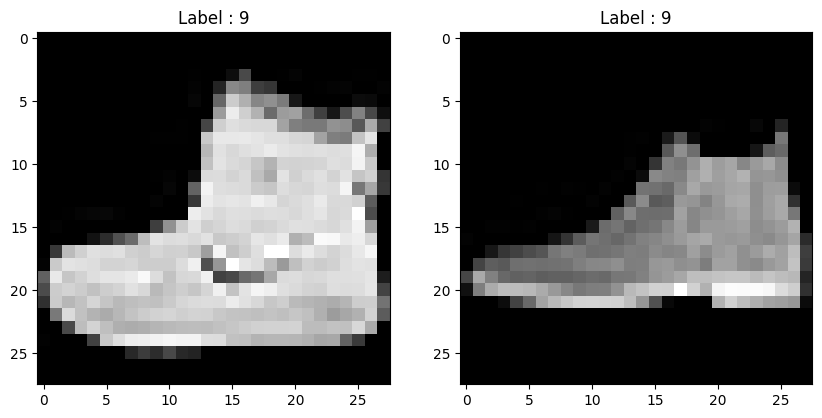

In [26]:

plt.figure(figsize=[10,20])
# Visualiza la primera imagen en la base de training
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_train[0]))

# Visualiza la primera imagen en la base de testing
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='gray')
plt.title("Label : {}".format(y_test[0]))

In [27]:
#Transformacion del formato de los datos
train_X = x_train.astype('float32')
test_X = x_test.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [28]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, y_train, test_size=0.2, random_state=1324)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [29]:
image_rows = train_X.shape[1]
image_cols = train_X.shape[2]
train_X = train_X.reshape(-1, 28, 28, 1)
valid_X = valid_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape 

((48000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
#Ajustar dimensiones de los datos
# image_rows = train_X.shape[1]
# image_cols = train_X.shape[2]
# train_X = train_X.reshape(-1,image_rows,image_cols, 1)
# test_X = test_X.reshape(-1,image_rows,image_cols, 1)
# train_X.shape, test_X.shape 

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

### 2. Estimación de un modelo utilizando redes neuronales convolucionales (45 puntos)

Estimen un modelo predictivo usando la muestra de entrenamiento y establezcan apropiadamente cada uno de los parámetros de la red.

In [31]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
digits_model = Sequential()
digits_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(image_rows,image_cols,1),padding='same'))
digits_model.add(MaxPooling2D((2, 2),padding='same'))
digits_model.add(Dropout(0.2))
digits_model.add(Flatten())
digits_model.add(Dense(64, activation='relu'))               
digits_model.add(Dense(nClasses, activation='softmax'))

In [32]:
digits_model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01),metrics =['accuracy'])
digits_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                401472    
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [33]:
batch_size = 4800
epochs = 25

digits_train = digits_model.fit(
    train_X, 
    train_label, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(valid_X, valid_label)
)

Epoch 1/25
10/10 [==============================] - 8s 726ms/step - loss: 1.2759 - accuracy: 0.5693 - val_loss: 0.6237 - val_accuracy: 0.7755
Epoch 2/25
10/10 [==============================] - 7s 718ms/step - loss: 0.5303 - accuracy: 0.8131 - val_loss: 0.4484 - val_accuracy: 0.8406
Epoch 3/25
10/10 [==============================] - 7s 686ms/step - loss: 0.4194 - accuracy: 0.8527 - val_loss: 0.3716 - val_accuracy: 0.8683
Epoch 4/25
10/10 [==============================] - 6s 648ms/step - loss: 0.3648 - accuracy: 0.8721 - val_loss: 0.3370 - val_accuracy: 0.8795
Epoch 5/25
10/10 [==============================] - 7s 663ms/step - loss: 0.3329 - accuracy: 0.8819 - val_loss: 0.3117 - val_accuracy: 0.8886
Epoch 6/25
10/10 [==============================] - 7s 662ms/step - loss: 0.3068 - accuracy: 0.8906 - val_loss: 0.3007 - val_accuracy: 0.8908
Epoch 7/25
10/10 [==============================] - 6s 652ms/step - loss: 0.2941 - accuracy: 0.8938 - val_loss: 0.2968 - val_accuracy: 0.8933
Epoch 

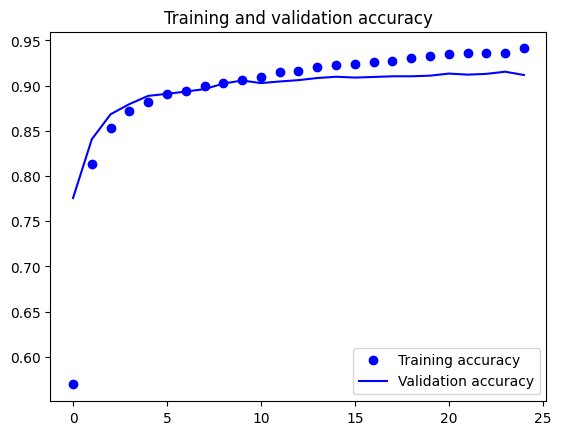

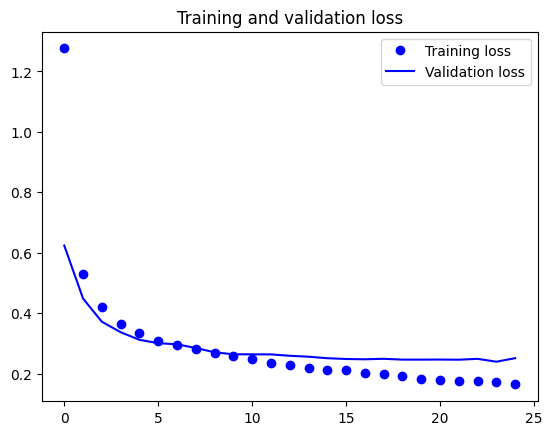

In [34]:
accuracy = digits_train.history['accuracy']
val_accuracy = digits_train.history['val_accuracy']
loss = digits_train.history['loss']
val_loss = digits_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Calidad de la predicción (40 puntos)

Evalúe el desempeño de su algoritmo con el set de _test_ y argumente sobre el nivel de precisión obtenido, tiempo de ejecución y la arquitectura de su red convolucional.

In [21]:
test_eval = digits_model.evaluate(test_X, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.27481159567832947
Test accuracy: 0.9064000248908997


313/313 [==============================] - 1s 2ms/step
Se encontraron 9065 labels correctos


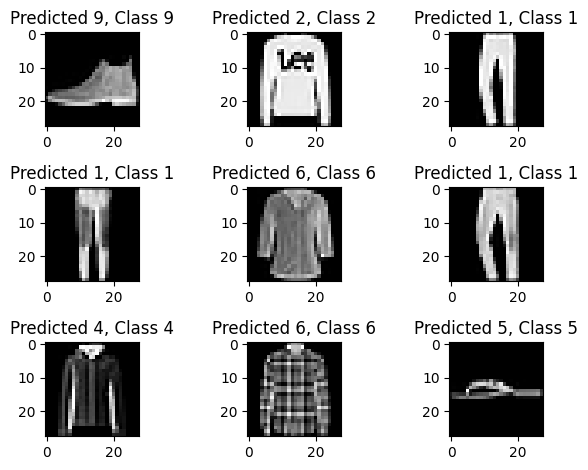

In [35]:
predicted_classes = digits_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==y_test)[0]
test="Se encontraron %s labels correctos" % len(correct)
print(test) 
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)